# dev for Getting intersections of curves in numpy

In [1]:
from lib.intersection import *
import numpy as np
from numba import jit, njit
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

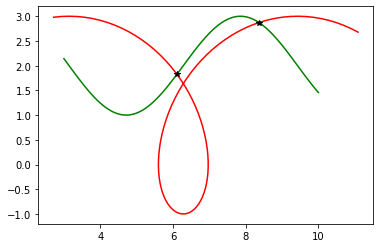

In [2]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=np.sin(phi)+2
tips = intersection(x1,y1,x2,y2)
x,y = tips

plt.plot(x1,y1,c='r')
plt.plot(x2,y2,c='g')
plt.plot(x,y,'*k')
plt.show()

### runtime speedtest results

- without numba = 3.34 seconds

In [7]:
%time
tips = intersection(x1,y1,x2,y2)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


# define hidden helper functions

In [36]:
def _rect_inter_inner(x1, x2):
    assert(type(x1)==np.ndarray)
    assert(type(x2)==np.ndarray)
    n1 = x1.shape[0]-1
    n2 = x2.shape[0]-1
    X1 = np.c_[x1[:-1], x1[1:]]
    X2 = np.c_[x2[:-1], x2[1:]]
    S1 = np.tile(X1.min(axis=1), (n2, 1)).T
    S2 = np.tile(X2.max(axis=1), (n1, 1))
    S3 = np.tile(X1.max(axis=1), (n2, 1)).T
    S4 = np.tile(X2.min(axis=1), (n1, 1))
    return S1, S2, S3, S4

def _rectangle_intersection_(x1, y1, x2, y2):
    S1, S2, S3, S4 = _rect_inter_inner(x1, x2)
    S5, S6, S7, S8 = _rect_inter_inner(y1, y2)

    C1 = np.less_equal(S1, S2)
    C2 = np.greater_equal(S3, S4)
    C3 = np.less_equal(S5, S6)
    C4 = np.greater_equal(S7, S8)

    ii, jj = np.nonzero(C1 & C2 & C3 & C4)
    return ii, jj

# create visualization for fast, parallelizeable, curve intersection
- written completely in numpy
- TODO: make input types work with numba.njit or numba.cuda.jit

In [37]:
S1, S2, S3, S4 = _rect_inter_inner(x1, x2)
S5, S6, S7, S8 = _rect_inter_inner(y1, y2)

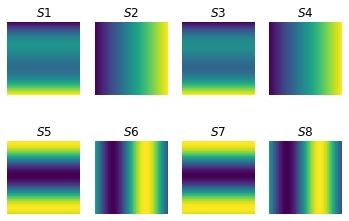

In [78]:
fig, axs = plt.subplots(2,4)#,figsize=(8,4))
a = list(axs[0])
a.extend(list(axs[1]))
S_lst = (S1,S2,S3,S4,S5,S6,S7,S8)
for n,ax,S in list(zip(range(len(S_lst)), a, S_lst)):
#     print(ax)
    ax.imshow(S)
    ax.axis('off')
    ax.set_title(f'$S{n+1}$')
fig.savefig('Figures/fast_intersection_coordinates.svg')

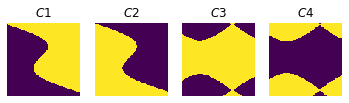

In [85]:
C1 = np.less_equal(S1, S2)
C2 = np.greater_equal(S3, S4)
C3 = np.less_equal(S5, S6)
C4 = np.greater_equal(S7, S8)

fig, axs = plt.subplots(1,4)#,figsize=(8,4))
# a = list(axs[0])
# a.extend(list(axs[1]))
a = axs
S_lst = (C1,C2,C3,C4)
for n,ax,S in list(zip(range(len(S_lst)), a, S_lst)):
#     print(ax)
    ax.imshow(S)
    ax.axis('off')
    ax.set_title(f'$C{n+1}$')
fig.savefig('Figures/fast_intersection_booleans.pdf')

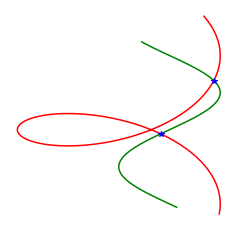

In [99]:
a, b = 1, 2
phi = np.linspace(3, 10, 100)
x1 = a*phi - b*np.sin(phi)
y1 = a - b*np.cos(phi)

x2=phi
y2=np.sin(phi)+2
tips = intersection(x1,y1,x2,y2)
x,y = tips
plt.figure(figsize=(4,4))
plt.plot(y1,x1,c='r')
plt.plot(y2,x2,c='g')
plt.plot(y,x,'*b')
plt.axis('off')
# plt.show()
plt.savefig('Figures/fast_intersection_example.svg')

# TODO: make/test rotate function for exception handling in intersect()
_application: retry funny intersection calls with a 45º rotation_<br>
if intersections(x) fails:
    return $R^{-1}\text{intersections}(X)R$ for rotation by pi/4 in out-of-plane axis<br>
`scipy.ndimage.rotate(input, angle, axes=(1, 0), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True)`